# **Aprendizaje Máquina - Examen II Actividad Suplementaria**

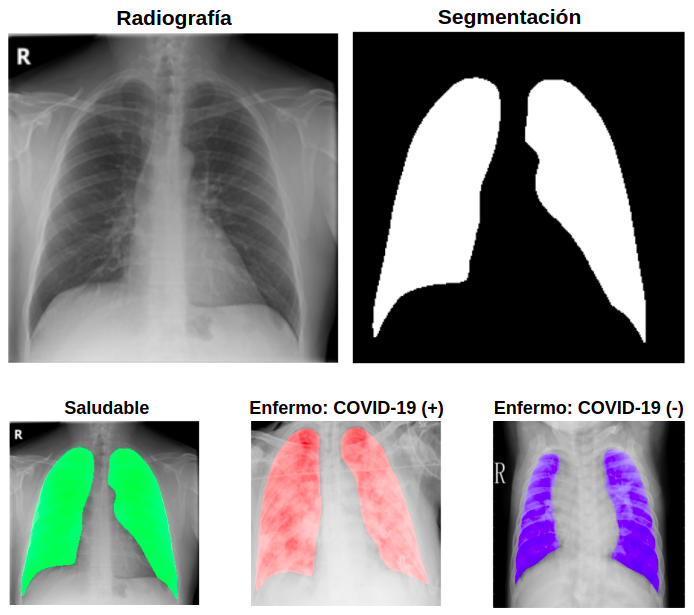

El objetivo de la actividad es aplicar tus conocimientos  sobre aprendizaje automático y redes neuronales convolucionales en la clasificación y localización de elementos de interés en imágenes.

Durante el desarrollo de la actividad necesitarás los conocimientos que has adquirido sobre:

- Manejo de tensores.
- Tensorflow y Keras.
- Uso del API funcional.
- Construcción de generadores de datos.
- Uso de métricas y funciones de costo.
- Entrenamiento y evaluación de modelos.
- Uso de modelos preentrenados.

Al concluir tu actividad, necesitas entregar el archivo **M3EX02.ipynb** con tus respuestas a las preguntas planteadas y el código correspondiente.


## **¡Listos para iniciar con la actividad!**



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#!rm -rf '/content/Test'
#!rm -rf '/content/Train'
#!rm -rf '/content/Val'

In [4]:
# Descomprimimos el archivo
!unzip '/content/drive/MyDrive/ML2023/examen2/m3ex02c-data.zip' -d "/content/data_suplementaria"

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: /content/data_suplementaria/Train/Normal/images/Normal (1782).png  
  inflating: /content/data_suplementaria/Train/Normal/images/Normal (1783).png  
  inflating: /content/data_suplementaria/Train/Normal/images/Normal (1784).png  
  inflating: /content/data_suplementaria/Train/Normal/images/Normal (1785).png  
  inflating: /content/data_suplementaria/Train/Normal/images/Normal (1786).png  
  inflating: /content/data_suplementaria/Train/Normal/images/Normal (1787).png  
  inflating: /content/data_suplementaria/Train/Normal/images/Normal (1788).png  
  inflating: /content/data_suplementaria/Train/Normal/images/Normal (1789).png  
  inflating: /content/data_suplementaria/Train/Normal/images/Normal (1790).png  
  inflating: /content/data_suplementaria/Train/Normal/images/Normal (1791).png  
  inflating: /content/data_suplementaria/Train/Normal/images/Normal (1792).png  
  inflating: /content/data_suplementaria/T

#Descripción del problema

A lo largo de la historia la humanidad ha experimentado pandemias, varias de las cuales han sido extremadamente desastrosas [[1]](https://www.mdpi.com/2075-4418/12/12/3171#B1-diagnostics-12-03171). La pandemia de COVID-19 se considera la más mortífera del último siglo, incluso peor que la gripe española [[2]](https://www.mdpi.com/2075-4418/12/12/3171#B2-diagnostics-12-03171). A partir de diciembre de 2019, la rápida propagación del COVID-19 causo una preocupación generalizada en todo el mundo. En pocas semanas se reportaron cientos de muertes y miles de enfermos en varios paises [[1]](https://www.mdpi.com/2075-4418/12/12/3171#B1-diagnostics-12-03171). Por lo anterior, la detección temprana del COVID-19 fue crucial para limitar la propagación del virus y brindar atención para prevenir complicaciones.

Una de las herramientas de diagnóstico más importantes para identificar y distinguir infecciones en humanos es la prueba RT-PCR (reacción en cadena de la polimerasa con transcripción inversa). Las imágenes de rayos X y las tomografías computarizadas (TC) son herramientas de diagnóstico adicionales que se utilizan para identificar COVID-19 [[3]](https://www.mdpi.com/2075-4418/12/12/3171#B3-diagnostics-12-03171). Basándose en la tomografía computarizada o la radiografía de las imágenes de los pulmones, los médicos pueden observar y examinar los signos asociados con las deformaciones del COVID-19. Sin embargo, al examinar los resultados de estas técnicas de imagen, los radiólogos pueden experimentar problemas técnicos que conduzcan a una disminución de la sensibilidad [[4]](https://www.mdpi.com/2075-4418/12/12/3171#B4-diagnostics-12-03171).

Nuestro reto consiste en construir un modelo (base) que ayude a los médicos en:

- la segmentación de pulmones en radiografías de pacientes y,
- el diágnostico del estado de salud del paciente que podría ser:
  - Paciente con pulmónes saludables.
  - Paciente con presencia de daño en pulmones debido a covid-19.
  - Paciente con presencia de daño en pulmones debido a otra enfermedad.

Para el desarrollo de tu actividad tienes a tu disposición los siguientes recursos:

- Código fuente de una ConvNet (base) para segmentación de pulmones en radiografías.
- Muestra de radiografias e imágenes segmentadas de pacientes con pulmónes saludables, con presencia de daño en pulmones debido a covid-19, con presencia de daño en pulmones debido a otra enfermedad.


Antes de continuar, descarga el conjunto de datos utilizando el siguiente enlace: [m3ex02-data.zip](https://drive.google.com/file/d/1VWw2irZjzfFoTrbfMLkLj6-nilUOZPHM/view?usp=sharing). Al descomprimir el archivo encontrarás los datos (imágenes) organizados de la siguiente forma:





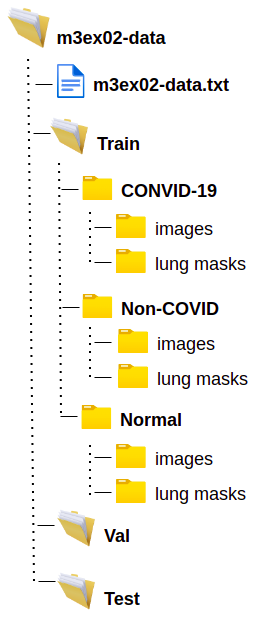

El directorio **images** contiene imágenes de radiografías (datos de entrada  `X`) en formato `png`, mientras que en el directorio **lung masks** se encuentran imágenes segmentadas (datos de salida `Y`). El nombre de cada archivo incluye un número identificador que podemos utilizar para identificar la dupla $(x^{(i)}, y^{(i)}_{s})$ correspondiente a cada ejemplo `i`.

Veamos algunos ejemplos:

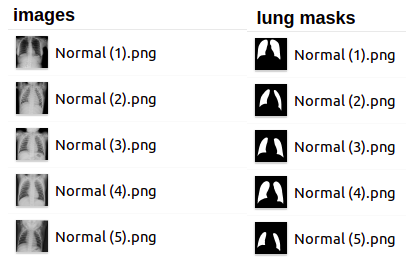

Acorde a la imagen anterior, para una tarea de segmentación, las duplas $(x^{(i)}, y^{(i)}_{s})$ para los ejemplos 1, 2, 3, 4, 5 serían las siguientes:

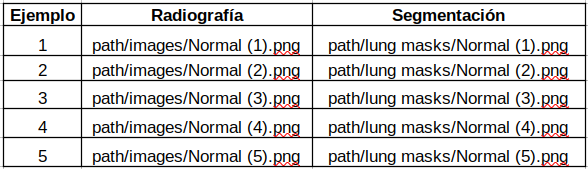


Sin embargo, si lo que buscamos es que nuestro modelo aprenda a realizar la segmentación y adicionalmente clasifique el estado de saludo, entonces cada ejemplo deberá ser representado mediante una tupla $(x^{(i)}, y^{(i)}_{s}, y^{(i)}_{c})$, en donde $y^{(i)}_{c}$ representa el estado de salud de los pulmones del ejemplo $i$.

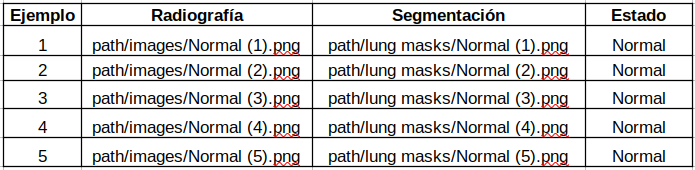



**Importante:** la muestra de datos nos permitirá verificar el modelo base y cada una de las funciones que implementes durante el desarrollo de la actividad.

**Importante:** debido al tiempo disponible para realizar la actividad, no se tomará en consideración el desempeño del modelo base.

#Desarrollo de la actividad

**1. Implementa una función llamada `list_of_examples` que reciba como parámetro el path en donde se encuentran los datos correspondientes a uno de los conjuntos: Train, Val o Test. La función deberá retornar la lista de ejemplos.** (30 pts)

Veamos un ejemplo de cómo debería poder ser utilizada la función:

```
train_path = "m3ex02-data/Train"
train_examples  = list_of_examples(train_path)
```
Cada elemento de la lista de ejemplos que retorne la función deberá tener el siguiente formato:

```
'path/image_filename.png, path/mask_filename.png, class'
```

Veamos un ejemplo:
```
m3ex02-data/Train/Normal/images/Normal (5332).png,m3ex02-data/Train/Normal/lung masks/Normal (5332).png,2
```

Antes de iniciar con la implementación de tu función, contesta la siguiente:

Acorde a la descripción del problema, la tarea que debe realizar el modelo y la organización original de los datos, ¿es necesario reorganizar los datos? ¿porque?

**Nota:** en caso de que consideres necesario reorganizar los datos, comparte tu propuesta de reorganización e implementa una función que te ayude a realizar la reorganización.

In [ ]:
# Escribe aquí tu respuesta


'''
Sí, es necesario reorganizar los datos para que el modelo pueda aprender a realizar la segmentación y la clasificación del estado de salud de los pulmones.
La organización original de los datos divide los datos en dos directorios: images y lung masks. En el directorio images se encuentran las imágenes de radiografías,
mientras que en el directorio lung masks se encuentran las imágenes segmentadas.
'''

# En caso de ser necesario implementa tu función para reorganizar los datos aquí.





In [5]:
# Aquí implementa la función 'list_of_examples' acorde a lo solicitado y a tu respuesta previa

#-------------------------------------------------------------------------

import os
import re
from pathlib import Path

def getClass(folder_name):
  cls = {'COVID-19':0, 'Non-COVID':1, 'Normal':2}
  return cls[folder_name]

def list_of_examples(path):
  images={}
  masks={}
  cls={}

  for root, _, filenames in os.walk(path):
    for f in filenames:
      item=re.findall(r'\d+',f)[-1]
      example = os.path.join(root, f)
      if Path(example).parts[-2] == 'images':
        images[item] = example
      elif Path(example).parts[-2] == 'infection masks':
        masks[item] = example
      elif Path(example).parts[-2] == 'lung masks':
        masks[item] = example
      cls[item]= getClass(Path(example).parts[-3])
  examples=[images[key] + ',' + masks[key] + ',' + str(cls[key]) for key in masks.keys() if key in images]
  return examples




"""
la función list_of_examples toma la ruta de un directorio que contiene imágenes médicas,
recorre este directorio y sus subdirectorios, organiza las imágenes y máscaras en diccionarios, asigna clases a cada ejemplo utilizando la función getClass,
y devuelve una lista de ejemplos en un formato específico.
"""

'\nla función list_of_examples toma la ruta de un directorio que contiene imágenes médicas,\nrecorre este directorio y sus subdirectorios, organiza las imágenes y máscaras en diccionarios, asigna clases a cada ejemplo utilizando la función getClass,\ny devuelve una lista de ejemplos en un formato específico.\n'

In [6]:
# Prueba el correcto funcionamiento de tu función ejecutando esta celda

train_path = '/content/data_suplementaria/Train'     #Indica el path real de tu conjunto de datos
train_examples  = list_of_examples(train_path)
print('Train dataset(size): ', len(train_examples))

val_path = '/content/data_suplementaria/Val'     #Indica el path real de tu conjunto de datos
val_examples  = list_of_examples(val_path)
print('Val dataset (size):', len(val_examples))

test_path = '/content/data_suplementaria/Test'     #Indica el path real de tu conjunto de datos
test_examples  = list_of_examples(test_path)
print('Test dataset (size): ', len(test_examples))

Train dataset(size):  3211
Val dataset (size): 932
Test dataset (size):  1164


In [7]:
# Verifica que el contenido de las listas sea correcto, imprimiendo uno de los ejemplos
# de cada lista

print(train_examples[0])
print(val_examples[0])
print(test_examples[0])

# ¿Los ejemplos tienes el formato esperado?
'''
Sí lo acomodé de tal forma que 'COVID-19':0, 'Non-COVID':1, 'Normal':2
'''

/content/data_suplementaria/Train/COVID-19/images/covid_4447.png,/content/data_suplementaria/Train/COVID-19/lung masks/covid_4447.png,0
/content/data_suplementaria/Val/COVID-19/images/covid_2426.png,/content/data_suplementaria/Val/COVID-19/lung masks/covid_2426.png,0
/content/data_suplementaria/Test/COVID-19/images/covid_1615.png,/content/data_suplementaria/Test/COVID-19/lung masks/covid_1615.png,0


"\nSí lo acomodé de tal forma que 'COVID-19':0, 'Non-COVID':1, 'Normal':2\n"

**2. Implementa una función llamada `load_examples` que reciba como parámetro un ejemplo ( train_examples[i], val_examples[i] o test_examples[i]). La función deberá retornar una tupla con tres tensores: `img`, `msk` y `cls`. Tal que `img` es la imagen correspondiente a la radiografía, `msk` la imagen con la segmentación del pulmon y `cls` representa el estado de salud de los pulmones.** (15 pts)

**Importante:** observemos que en este problema, `msk` y `cls` son la predicción esperada. Es decir, es nuestra $y^{(i)}$, pero también la podemos representar como $(y^{(i)}_{s}, y^{(i)}_{c})$.

Veamos un ejemplo de cómo debería poder ser utilizada la función:

```
img, msk, cls = load_example(train_examples[0])
```

Antes de iniciar con la implementación de tu función, contesta la siguiente:

Acorde a la descripción del problema, la tarea que debe realizar el modelo y el tiempo que tienes disponible, ¿qué transformaciones conviene realizar sobre los tensores: `img` y `msk`? ¿porque?


In [50]:
import tensorflow as tf
def load_example(example):
  item= tf.strings.split(example, sep=",")

  ifile = tf.io.read_file(item[0])
  img = tf.image.decode_png(ifile, channels=3)
  img = tf.image.convert_image_dtype(img, dtype=tf.float32)
  img = tf.image.resize(img, (32, 32))

  mfile = tf.io.read_file(item[1])
  msk = tf.image.decode_png(mfile, channels=1)
  msk = tf.image.convert_image_dtype(msk, dtype=tf.float32)
  msk = tf.image.resize(msk, (32, 32))

  indice=tf.cast(tf.strings.to_number(item[2]), dtype=tf.int32)
  cls = tf.one_hot(indice, 3)
  return (img, (msk, cls))

In [51]:
# Prueba la correcta implementación de tu función
img, (msk, cls) = load_example(train_examples[0])

In [52]:
msk.shape

TensorShape([32, 32, 1])

**3. Implementa una función llamada `plot_example` que reciba como parámetros los tensores: img y msk. La función debe mostrar en pantalla la imagen de la radiografía y los pulmones segmentados.** (15 pts)   


In [53]:
# Implementa aquí tu función plot_example
import numpy as np
import matplotlib.pyplot as plt

def plot_example(img, msk, cls):
  mask = np.zeros(img.numpy().shape)
  mask[:,:,0] = msk.numpy()[:,:,0]
  output = tf.math.maximum(img.numpy(), mask)
  plt.title("Clase: " + str(cls.numpy()))
  plt.axis('off')
  plt.imshow(output)

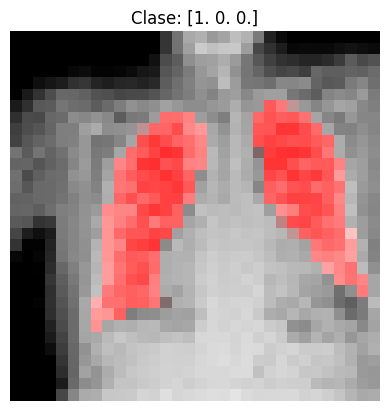

In [54]:
plot_example(img, msk, cls)

Verifica la implementación de tu función ejecutando la siguiente celda.

El resultado de la ejecución debería ser similar a la siguiente imagen:

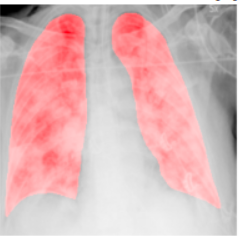

**nota:** el color que utilices para resaltar los pulmones puede variar dependiendo de tu elección.


**4. Basado en `tf.data.Dataset.from_tensor_slices` implementa tres pipelines para los datasets de entrenamiento, validación y pruebas. Cada pipeline debe permitir generar batchs de datos de tamaño 32 y aplicar operaciones para el aumento de datos en el caso de los datasets de entrenamiento y pruebas.** (15 pts)

Antes de iniciar con tu implementación de los `pipelines`, enumera las operaciones que se realizarán en cada uno de los pipelines e indica porque es conveniente cada operación.


In [ ]:
# Aquí escribe la respuesta






In [55]:
# Aquí implementa tu pipeline para el dataset de entrenamiento

from tensorflow.data import AUTOTUNE

batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices(train_examples)
train_dataset = (train_dataset
                 .shuffle(len(train_examples))
                 .map(load_example, num_parallel_calls=AUTOTUNE)
                 .cache()
                 .batch(batch_size)
                 .prefetch(AUTOTUNE)
                 )

In [56]:
# Aquí implementa tu pipeline para el dataset de validación

val_dataset = tf.data.Dataset.from_tensor_slices(val_examples)
val_dataset = (val_dataset
                 .shuffle(len(val_examples))
                 .map(load_example, num_parallel_calls=AUTOTUNE)
                 .cache()
                 .batch(batch_size)
                 .prefetch(AUTOTUNE)
                 )

In [57]:
# Aquí implementa tu pipeline para el dataset de pruebas

test_dataset = tf.data.Dataset.from_tensor_slices(test_examples)
test_dataset = (test_dataset
                 .shuffle(len(test_examples))
                 .map(load_example, num_parallel_calls=AUTOTUNE)
                 .cache()
                 .batch(batch_size)
                 .prefetch(AUTOTUNE)
                 )

In [60]:
i = iter(train_dataset)
img, (msk, cls) = next(i)

In [61]:
print(img.shape, msk.shape, cls.shape)

(32, 32, 32, 3) (32, 32, 32, 1) (32, 3)


**5. Construye y entrena un modelo basado en redes neuronal convolucionales que a partir de una radiografía de entrada genere la segmentación de los pulmones e indique su estado de salud**. (30 pts)

Para la construcción de tu modelo tienes a tu disposición una red neuronal convolucional (base) construida para recibir radiografías y realizar la segmentación de los pulmones. Utiliza esta ConvNet como punto de partida y realiza los cambios pertinentes en la topología para que el modelo realice las tareas planteadas en el problema.

Antes de continuar, te invitamos a analizar la estructura de la ConvNet (base) y responder las siguientes preguntas:

1) Enumera los cambios que propones realizar en la topología de la ConvNet para que pueda aprender a realizar las tareas descritas en el problema.

2) Justifica cada cambio propuesto en la topología de la ConvNet.

In [ ]:
# Aquí escribe las respuesta a las preguntas 1 y 2.









In [69]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization
from tensorflow.keras.layers import Activation, SeparableConv2D, MaxPooling2D
from tensorflow.keras.layers import add, Conv2DTranspose, UpSampling2D
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# Agregue las librerías que requiera

In [70]:
# Función que construye a ConvNet (base)

#parámetro de entrada de la función:
#  img_shape      forma del tensor de entrada
#  num_classes    número de clases de objetos de interes que serán segmentados

#Parámetro de salida de la función:
#  model          red neuronal convolucional

# Dentro de esta función, incluya los cambios necesarios para que la topología de la ConVNet
# sea apropiada para realizar la tarea planteada en el problema y considerando el tipo de
# tensores retornan los generadores de datos que implementaste previamente

def build_model(img_shape, num_classes=10):

    inputs = Input(shape=img_shape)

    ### Encoder ###
    x = Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    previous_block_activation = x  #  referencia para conexión residual

    # Bloques 1, 2, 3 identicos pero variando la cantidad de filtros.
    for filters in [64, 128, 256]:
        x = Activation("relu")(x)
        x = SeparableConv2D(filters, 3, padding="same")(x)
        x = BatchNormalization()(x)

        x = Activation("relu")(x)
        x = SeparableConv2D(filters, 3, padding="same")(x)
        x = BatchNormalization()(x)

        x = MaxPooling2D(3, strides=2, padding="same")(x)

        # Conexión residual
        residual = Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = add([x, residual])              # incluir la conexión residual
        previous_block_activation = x       # referencia para conexión residual

    ### [Decoder] ###
    for filters in [256, 128, 64, 32]:
        x = Activation("relu")(x)
        x = Conv2DTranspose(filters, 3, padding="same")(x)
        x = BatchNormalization()(x)

        x = Activation("relu")(x)
        x = Conv2DTranspose(filters, 3, padding="same")(x)
        x = BatchNormalization()(x)

        x = UpSampling2D(2)(x)

        # Conexión residual
        residual = UpSampling2D(2)(previous_block_activation)
        residual = Conv2D(filters, 1, padding="same")(residual)
        x = add([x, residual])         # incluir la conexión residual
        previous_block_activation = x  # referencia para conexión residual

    # Capa para la clasificación de pixeles
    outputs = Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    # Definir el modelo
    model = Model(inputs, outputs)
    return model

In [71]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.applications.vgg16 import VGG16

58889256/58889256 [==============================] - 3s 0us/step


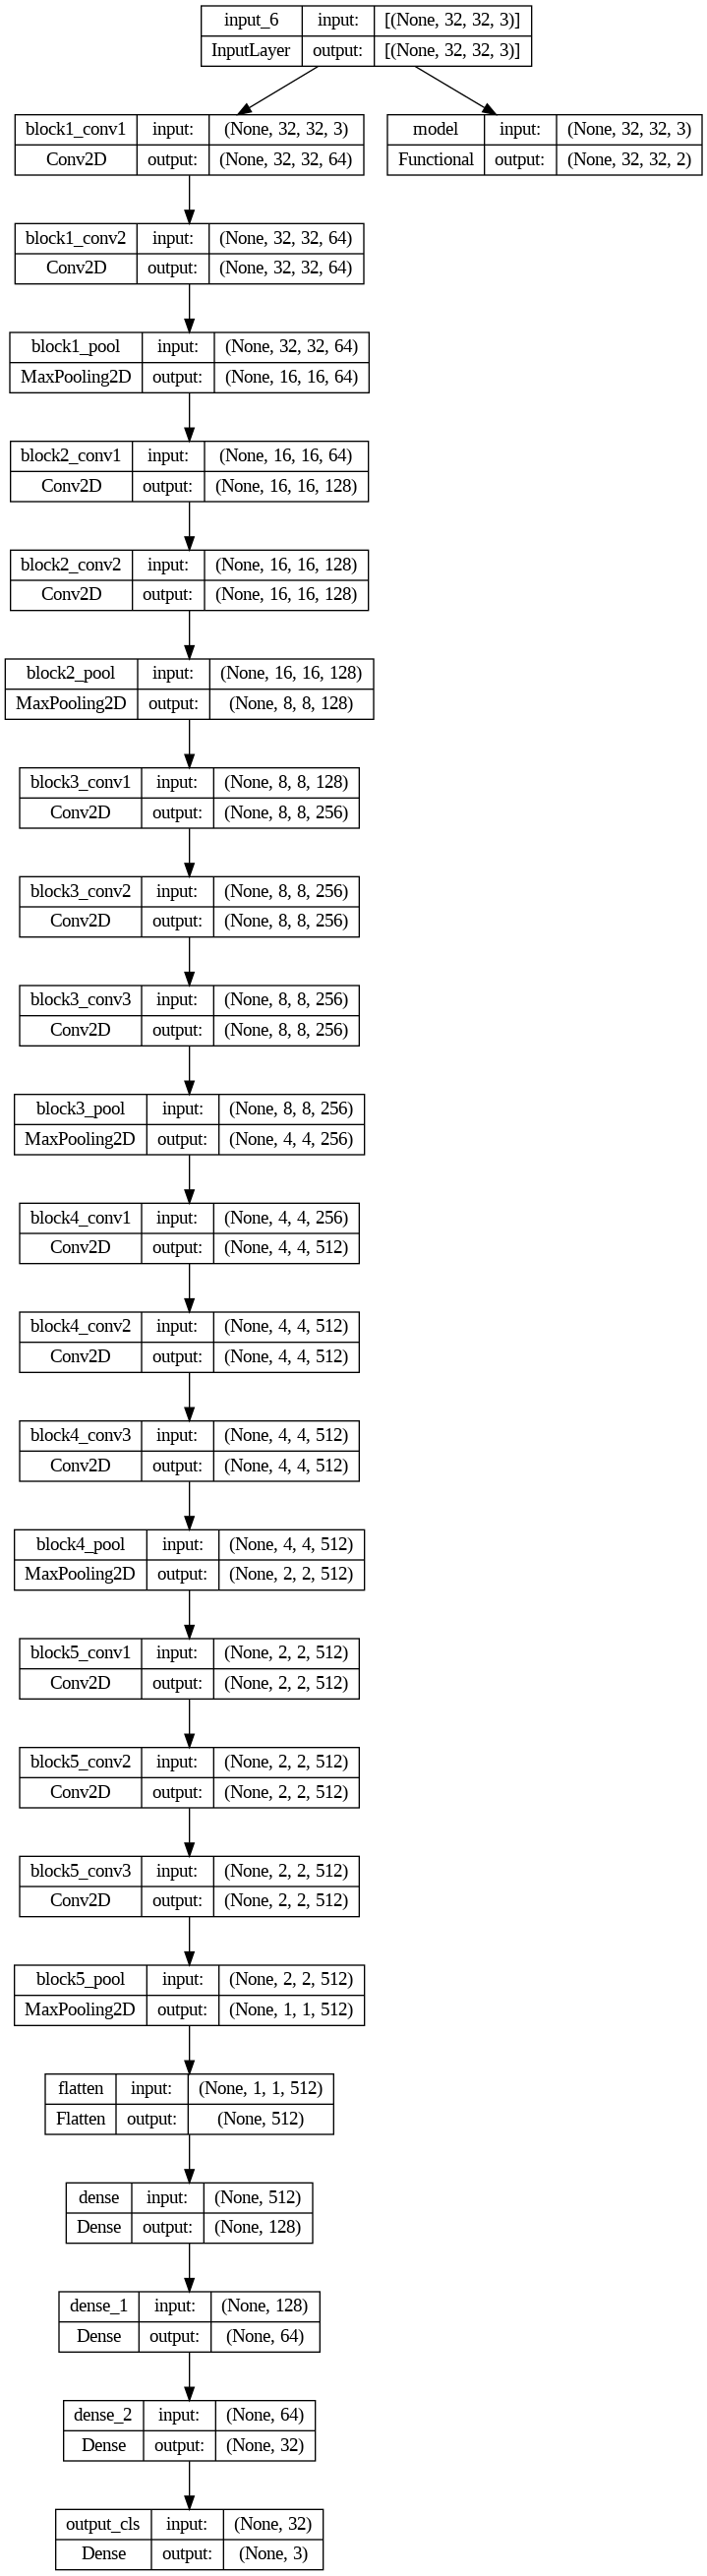

In [73]:
# Construcción del modelo

input_tensor_sc = Input(shape=(32, 32, 3))
like_UNet = build_model((32, 32, 3), num_classes=2)        #Invoque a la función build_model(img_shape, num_classes=10)

output_tensor_seg = like_UNet(input_tensor_sc)

vgg = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor_sc)
vgg.trainable=False
x_tensor = Flatten()(vgg.output)
x_tensor = Dense(128, activation='relu')(x_tensor)
x_tensor = Dense(64, activation='relu')(x_tensor)
x_tensor = Dense(32, activation='relu')(x_tensor)
output_tensor_cls = Dense(3, activation='softmax', name='output_cls')(x_tensor)

model = Model(inputs=input_tensor_sc, outputs=[output_tensor_seg, output_tensor_cls])

plot_model(model, show_shapes=True)   #Visualicemos la topología de la ConvNet




In [74]:
model.compile(
    optimizer='adam',
    loss={'model': 'sparse_categorical_crossentropy', 'output_cls': 'categorical_crossentropy'},
    metrics={'model': 'acc', 'output_cls': 'acc'}
)


In [75]:
# Entrenamiento del modelo y validación al final de cada época
history = model.fit(train_dataset, epochs=2, validation_data = val_dataset)

Epoch 1/2
101/101 [==============================] - 40s 132ms/step - loss: 1.3470 - model_loss: 0.5315 - output_cls_loss: 0.8155 - model_acc: 0.8650 - output_cls_acc: 0.6478 - val_loss: 1.3638 - val_model_loss: 0.5157 - val_output_cls_loss: 0.8481 - val_model_acc: 0.7450 - val_output_cls_acc: 0.6298
Epoch 2/2
101/101 [==============================] - 3s 28ms/step - loss: 0.8512 - model_loss: 0.1749 - output_cls_loss: 0.6763 - model_acc: 0.9154 - output_cls_acc: 0.7097 - val_loss: 1.2970 - val_model_loss: 0.4211 - val_output_cls_loss: 0.8759 - val_model_acc: 0.7913 - val_output_cls_acc: 0.6288


In [76]:
# Realicemos la predicción con 10 ejemplos de prueba

# Incluye aquí el código que requieras

i = iter(test_dataset)
test_images, (test_seg, test_cls) = next(i)

In [77]:
seg, cls=model.predict(test_images)

1/1 [==============================] - 1s 644ms/step


In [78]:
print(cls[0])

[0.08876739 0.7187697  0.19246292]


Adicionalmente, necesitarás verificar lo siguiente:

    ¿requieres hacer algún cambio en los generadores de datos? (entrenamiento, validación y pruebas)
    ¿qué cambios necesitas realizar en la red neural convolucial (inputs/outputs)?

Acorde a los cambios realizados en la funciones listadas anteriormente, en los generadores de datos y/o en la arquitectura de la red neuronal convolucional, necesitas realizar los cambios pertinentes en los métodos compile() y fit() del modelo.

    Pipelines de generadores de datos (entrenamiento, validación y pruebas) - 10 pts
    Modelo basado en redes neuronales convolucionales - 30 pts
